## Assignment1 : Exploratory Data Analysis and Feature Engineering with the Melbourne Housing Dataset

Objective:
The objective of this assignment is to conduct an exploratory data analysis (EDA) and apply
feature engineering techniques to enhance the predictive modelling capabilities using the
Melbourne Housing dataset.

Module: CS401 Machine Learning

Student Name: Precious Deremo

Student Number: 20325666

Importing all of the necessary mathemeatical functions to visualise the graphs of the housing data.


Read an overview of the practical skills documentation to bring me up to speed on how to approach the assignment 

Downloaded the melbourne data 

Took notes of missing data/required data 

Tried to define what the data means 

Used Excel Workbook’s Quick Analysis tool to pick out obvious traits of the data and look through its suggestions.  

Tried analysing the data on the jupyter notebook by follwing the cs dojo example. Ran into an error : C:\Users\pdere\AppData\Local\Temp\ipykernel_83052\1220715966.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False. 
  mel_housing = pd.read_csv('Melbourne_housing.csv') 

  https://www.roelpeters.be/solved-dtypewarning-columns-have-mixed-types-specify-dtype-option-on-import-or-set-low-memory-in-pandas/ -> used the dtype solution provided in here and managed to visual the data 

 This helped me understand the issue more at first -> https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options 

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Data Loading and Initial Exploration (20 points):

In [2]:
mel_housing = pd.read_csv('Melbourne_housing.csv')

C:\Users\pdere\AppData\Local\Temp\ipykernel_41760\789277600.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  mel_housing = pd.read_csv('Melbourne_housing.csv')


1.1 Provide information on the dataset, including the number of rows and columns.

Figured out that there was 34857 rows × 22 columns. 
Following the csdojo tutorial I decided to use the code provided to see how many type ‘h’ there was, and found 23980 rows × 22 columns. 
I noticed in BuildingArea there are values such as inf or NaN which do not seem valuable to the data so I will try to remove these which means I will be removing any data connected to. 

I am having difficulties catching the NaN, which is weird since I specified the BuildingArea as a string type so I figured I could display the information along with the inf and see how many columns of that there was.

In [3]:
mel_housing

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,NaN,105.0,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,475000.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,NaN,225.0,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,591000.0
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.0,152.0,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,NaN
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.0,NaN,NaN,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,Detached Garage,780500.0


This is the size of the housing data

In [67]:
mel_housing.size

766854

1.2 Briefly describe the target variable (e.g., 'Price') and its distribution.

Displaying the distrubution of the Price according the the original state of the data since the goal of this analysis is to determine how to predict the prices of housing.

Text(0.5, 1.0, 'Distribution of Price')

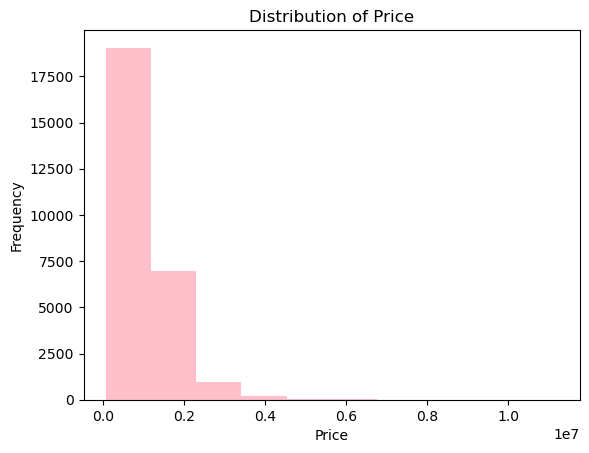

In [4]:
mel_housing['Price'].hist(color='pink', grid=False)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

According to the distribution metric, the distribution of Price is positively skewed.

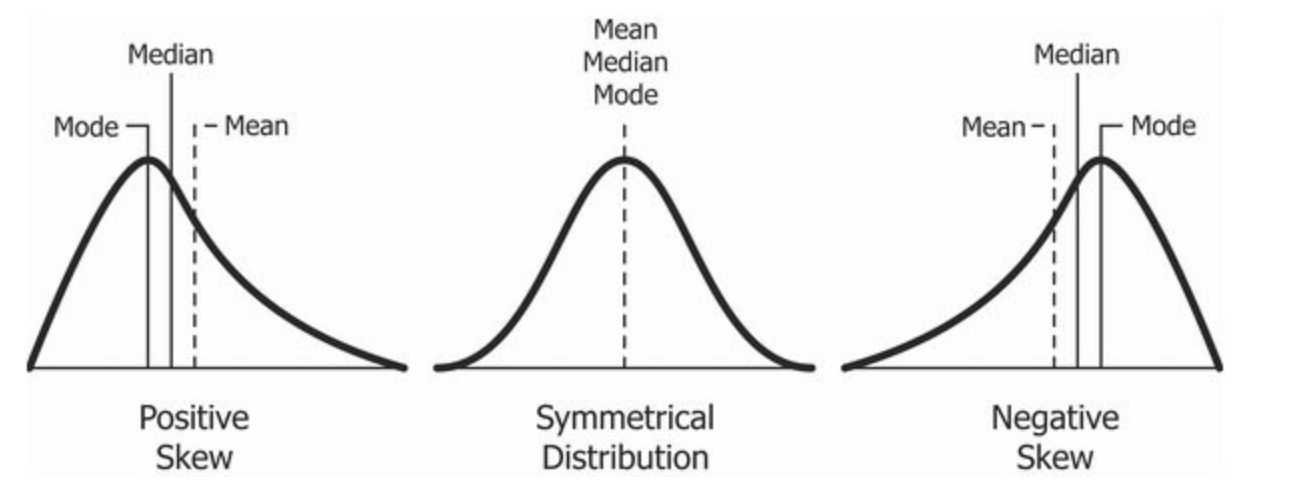

In [5]:
from IPython import display
display.Image("dist.png")

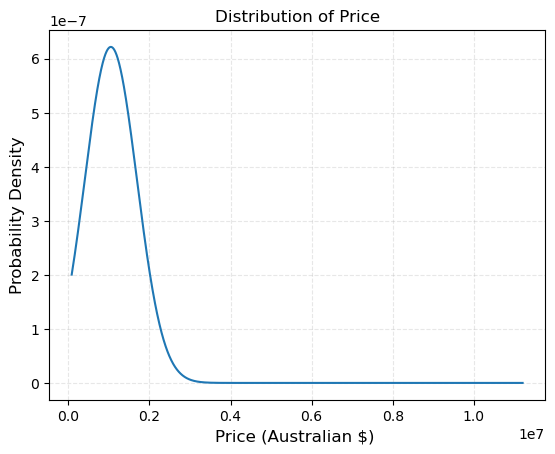

In [6]:
mh_mean = np.mean(mel_housing["Price"])
mh_std = np.std(mel_housing["Price"])

pdf = stats.norm.pdf(mel_housing["Price"].sort_values(), mh_mean, mh_std)
# X axis is showing the price in decimals in respect to 1 million australian dollars
plt.plot(mel_housing["Price"].sort_values(), pdf)
plt.xlabel("Price (Australian $) ", size=12)    
plt.ylabel("Probability Density", size=12)
plt.title('Distribution of Price')                
plt.grid(True, alpha=0.3,linestyle="--")
plt.show()

I displayed the datatypes and was shown objects so I assume I should be displaying the actual types and will be converting them from object to their value types as per this solution https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options 

The plan for handling the missing values was to exclude any data relating to them 

I searched around for a solution and found https://www.digitalocean.com/community/tutorials/pandas-dropna-drop-null-na-values-from-dataframe 

Handling missing data
    Showcasing how much of the data has invalid values to figure out which values would be good to drop and focus on

    I switched from the anaconda version of jupyter to the vscode conda version and everything worked fine. I decided to stick with this for the time being. 

I used this solution to get rid of the NaN and inf vals -> https://sparkbyexamples.com/pandas/pandas-drop-infinite-values-from-dataframe/#:~:text=By%20using%20replace()%20%26%20dropna,represented%20in%20NumPy%20as%20np. 

1.4 Identify any missing values and outline a plan to handle them

In [7]:
mel_housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

In [71]:
mel_housing.isnull().sum()/len(mel_housing)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom          23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.524428
YearBuilt        55.386293
CouncilArea       0.008607
Latitude         22.882061
Longtitude       22.882061
Regionname        0.000000
Propertycount     0.008607
ParkingArea       0.000000
Price            21.832057
dtype: float64

as distance, postcode and councilarea along with propertycount dont have that much missing data i decided to drop the invalid data within these columns since they werent very important. Keeping the data concise is very important. It seems this data was missing at random

3.1 Handling missing data (e.g., imputation methods)

In [72]:
mel_housing = mel_housing.dropna(subset=['Distance', 'Postcode', 'CouncilArea', 'Propertycount'])
mel_housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom           8214
Bathroom          8223
Car               8725
Landsize         11807
BuildingArea     21094
YearBuilt        19303
CouncilArea          0
Latitude          7973
Longtitude        7973
Regionname           0
Propertycount        0
ParkingArea          0
Price             7610
dtype: int64

Printing the column names along with their data types and then changing object to category to show how many categories there are

In [73]:
print(mel_housing.dtypes)

Suburb            object
Address           object
Rooms              int64
Type              object
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom          float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea      object
YearBuilt        float64
CouncilArea       object
Latitude         float64
Longtitude       float64
Regionname        object
Propertycount    float64
ParkingArea       object
Price            float64
dtype: object


3.2 Encoding categorical variables (e.g., one-hot encoding or label encoding)

Encoding categorical variables

In [75]:
objtocat = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname', 'ParkingArea']
for colname in objtocat:
    mel_housing[colname] = mel_housing[colname].astype('category')
    
mel_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34854 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34854 non-null  category
 1   Address        34854 non-null  category
 2   Rooms          34854 non-null  int64   
 3   Type           34854 non-null  category
 4   Method         34854 non-null  category
 5   SellerG        34854 non-null  category
 6   Date           34854 non-null  object  
 7   Distance       34854 non-null  float64 
 8   Postcode       34854 non-null  float64 
 9   Bedroom        26640 non-null  float64 
 10  Bathroom       26631 non-null  float64 
 11  Car            26129 non-null  float64 
 12  Landsize       23047 non-null  float64 
 13  BuildingArea   13760 non-null  object  
 14  YearBuilt      15551 non-null  float64 
 15  CouncilArea    34854 non-null  category
 16  Latitude       26881 non-null  float64 
 17  Longtitude     26881 non-null  float

C:\Users\pdere\AppData\Local\Temp\ipykernel_20140\1286130307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mel_housing[colname] = mel_housing[colname].astype('category')


Bringing in a new variable to hold the age of the housing property in order to get rid of other useless data such as YearBuilt, this is to make it easier for people to see how long the housing property has been around

In [76]:
# Remove false BuildingArea
mel_housing = mel_housing[mel_housing['BuildingArea']!=0]

# Remove false YearBuilt (Melbourne Founded 1835)
mel_housing = mel_housing[mel_housing['YearBuilt']> 1835]

# Adding feature for house age 
mel_housing['PropertyAge'] = 2023 - mel_housing['YearBuilt']
mel_housing

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,PropertyAge
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0,7.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0,123.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN,20.0
5,Alphington,6 Smith St,4,h,S,Brace,3/9/2016,6.4,3078.0,3.0,...,263,1930.0,Darebin City Council,-37.77070,145.03180,Northern Metropolitan,2211.0,Underground,2000000.0,93.0
6,Alphington,5/6 Yarralea St,3,h,S,Jellis,3/9/2016,6.4,3078.0,3.0,...,inf,2013.0,Darebin City Council,-37.78540,145.03250,Northern Metropolitan,2211.0,Outdoor Stall,1110000.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,Noble Park,5 Blaby St,3,h,PI,C21,30/09/2017,22.7,3174.0,3.0,...,130.0,1959.0,Greater Dandenong City Council,-37.96900,145.18226,South-Eastern Metropolitan,11806.0,Indoor,627500.0,64.0
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,105.0,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,475000.0,33.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,225.0,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,591000.0,28.0
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,152.0,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,NaN,53.0


Keeping the data concise as i do not need yearbuilt, method, latitude and longitude as from face value there is not enough contextual data for me to deem them very important

In [77]:
mel_housing = mel_housing.drop(['YearBuilt','Method','Latitude','Longtitude'], axis = 1)
mel_housing

,Suburb,Address,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount,ParkingArea,Price,PropertyAge
1,Airport West,154 Halsey Rd,3,t,Nelson,3/9/2016,13.5,3042.0,3.0,2.0,1.0,303.0,225,Moonee Valley City Council,Western Metropolitan,3464.0,Detached Garage,840000.0,7.0
2,Albert Park,105 Kerferd Rd,2,h,hockingstuart,3/9/2016,3.3,3206.0,2.0,1.0,0.0,120.0,82,Port Phillip City Council,Southern Metropolitan,3280.0,Attached Garage,1275000.0,123.0
4,Alphington,30 Austin St,3,h,McGrath,3/9/2016,6.4,3078.0,3.0,2.0,1.0,174.0,122,Darebin City Council,Northern Metropolitan,2211.0,Parkade,NaN,20.0
5,Alphington,6 Smith St,4,h,Brace,3/9/2016,6.4,3078.0,3.0,2.0,4.0,853.0,263,Darebin City Council,Northern Metropolitan,2211.0,Underground,2000000.0,93.0
6,Alphington,5/6 Yarralea St,3,h,Jellis,3/9/2016,6.4,3078.0,3.0,2.0,2.0,208.0,inf,Darebin City Council,Northern Metropolitan,2211.0,Outdoor Stall,1110000.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,Noble Park,5 Blaby St,3,h,C21,30/09/2017,22.7,3174.0,3.0,1.0,6.0,569.0,130.0,Greater Dandenong City Council,South-Eastern Metropolitan,11806.0,Indoor,627500.0,64.0
34852,Reservoir,18 Elinda Pl,3,u,RW,30/09/2017,12.0,3073.0,3.0,1.0,1.0,NaN,105.0,Darebin City Council,Northern Metropolitan,21650.0,Parkade,475000.0,33.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,Raine,30/09/2017,20.6,3064.0,4.0,2.0,2.0,NaN,225.0,Hume City Council,Northern Metropolitan,5833.0,Underground,591000.0,28.0
34854,Springvale South,8 Bellbird Ct,4,h,Barry,30/09/2017,22.2,3172.0,4.0,2.0,2.0,534.0,152.0,Greater Dandenong City Council,South-Eastern Metropolitan,4054.0,Carport,NaN,53.0


1.3 Display summary statistics and data types of the features.

In [78]:
mel_housing.describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Propertycount,Price,PropertyAge
count,15543.000000,15543.00000,15543.000000,15543.000000,15542.000000,15291.000000,13709.000000,15543.000000,1.207800e+04,15543.000000
mean,3.108473,11.15479,3117.082481,3.090330,1.670634,1.704205,531.397768,7519.586116,1.077308e+06,57.630380
std,0.986302,6.94583,115.296813,1.008559,0.735059,1.000952,1053.382858,4302.386291,6.714684e+05,36.765601
min,1.000000,0.00000,3000.000000,0.000000,0.000000,0.000000,0.000000,129.000000,8.500000e+04,-83.000000
25%,2.000000,6.30000,3047.000000,2.000000,1.000000,1.000000,204.000000,4442.000000,6.320000e+05,23.000000
50%,3.000000,10.10000,3101.000000,3.000000,2.000000,2.000000,470.000000,6763.000000,8.852500e+05,53.000000
75%,4.000000,14.00000,3155.000000,4.000000,2.000000,2.000000,658.000000,10331.000000,1.320000e+06,83.000000
max,12.000000,48.10000,3978.000000,30.000000,12.000000,26.000000,42800.000000,21650.000000,9.000000e+06,173.000000


## Exploratory Data Analysis (EDA) (30 points):

Distribution of Price after i had refined the data

2.1 Visualize the distribution of numeric variables using histograms and box plots.

Text(0.5, 1.0, 'Distribution of Price')

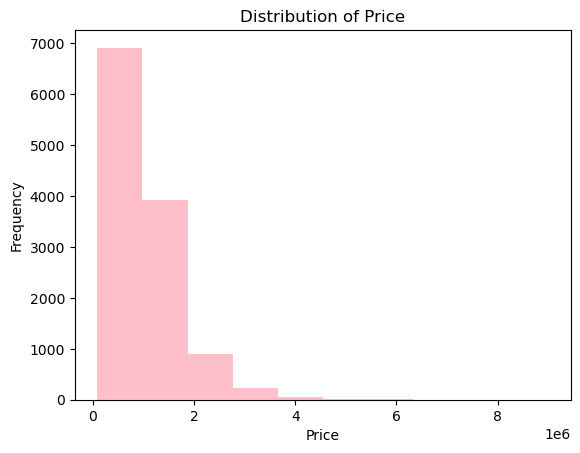

In [79]:
mel_housing['Price'].hist(color='pink', grid=False)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

Finding the correlation between Price and some numerical data in order to calculate which values depend on which Price.

In [80]:
print('Correlation of Price and Landsize is ', mel_housing['Price'].corr(mel_housing['Landsize']))
print('Correlation of Price and Propertycount is ',mel_housing['Price'].corr(mel_housing['Propertycount']))
print('Correlation of Price and Distance is ', mel_housing['Price'].corr(mel_housing['Distance']))
print('Correlation of Price and PropertyAge is ', mel_housing['Price'].corr(mel_housing['PropertyAge']))

Correlation of Price and Landsize is  0.05957442097897617
Correlation of Price and Propertycount is  -0.05908207218928333
Correlation of Price and Distance is  -0.23229107807731325
Correlation of Price and PropertyAge is  0.33996565172632415


Wanted to graph the lines of best fit for price, landsize and propertyage to view where the average data values lie and identify any of the possible ouytliers for this data.

2.2 Explore relationships between features and the target variable using scatter plots and
correlation matrices.

c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


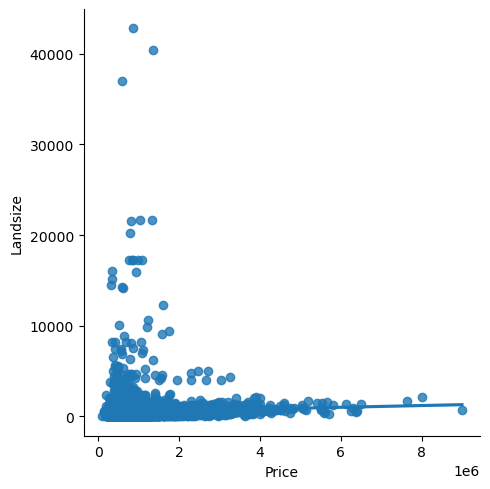

In [81]:
sns.lmplot(x="Price", y="Landsize", data=mel_housing)


c:\Users\pdere\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


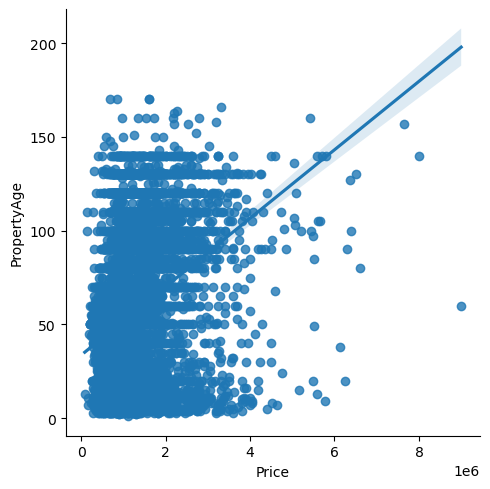

In [25]:
sns.lmplot(x="Price", y="PropertyAge", data=mel_housing)

Box Plots
I needed to look up the definition as i have never made a box plot before but this is to further visualise the outliers of the numerical values from the data set provided.


2.3 Examine categorical variables with bar plots and frequency tables.

2.4 Identify potential outliers and discuss their impact on the dataset.

<Axes: >

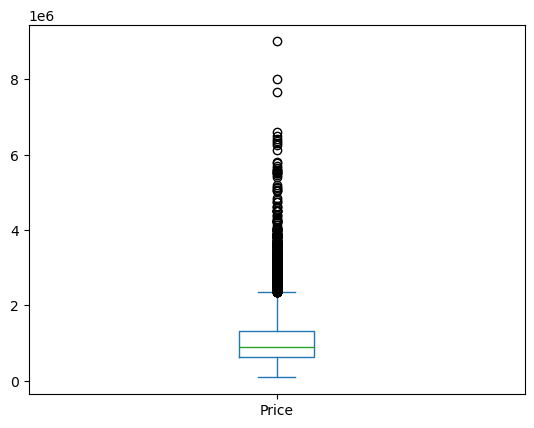

In [82]:
mel_housing['Price'].plot(kind = 'box')


<Axes: >

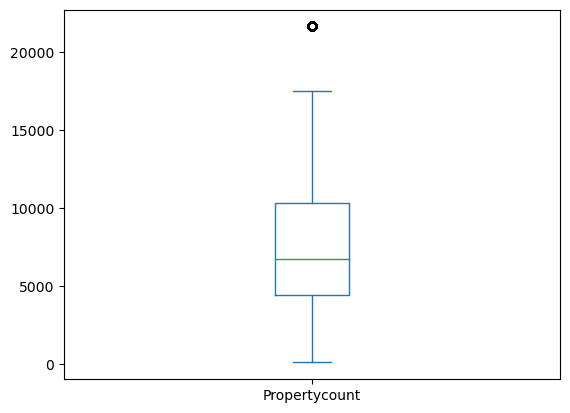

In [83]:
mel_housing['Propertycount'].plot(kind = 'box')

<Axes: >

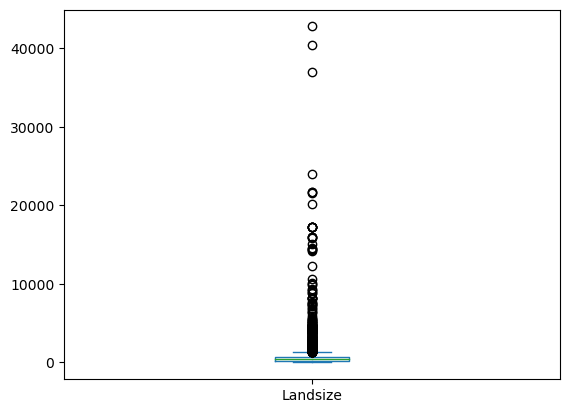

In [84]:
mel_housing['Landsize'].plot(kind = 'box')

<Axes: >

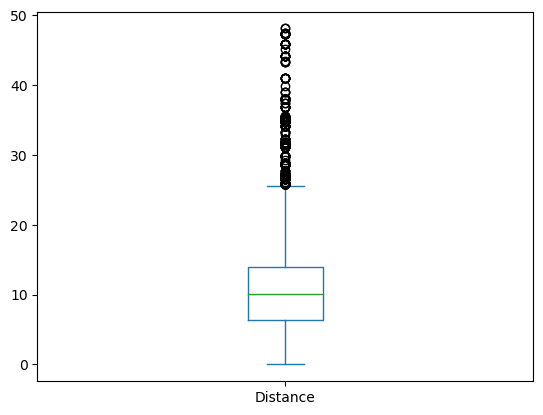

In [85]:
mel_housing['Distance'].plot(kind = 'box')

Bar plots of prices per regionname as i found there were 8 regions all together which made it easier to graph rather than the SellerG which had way to many names

['Nelson', 'hockingstuart', 'McGrath', 'Brace', 'Jellis', ..., 'Ace', 'Leased', 'Avion', 'Weston', 'Craig']
Length: 306
Categories (388, object): ['@Realty', 'A', 'AIME', 'ASL', ..., 'iProperty', 'iSell', 'iTRAK', 'voglwalpole']

I identified the types, although there is no data to explain the letter representatives, it seems that type 'h' has the highest value when it comes to housing in melbourne, which will be great to look at throughout some of the analysis

## Feature Engineering (40 points):

In [86]:
print(mel_housing['Type'].unique())

['t', 'h', 'u']
Categories (3, object): ['h', 't', 'u']


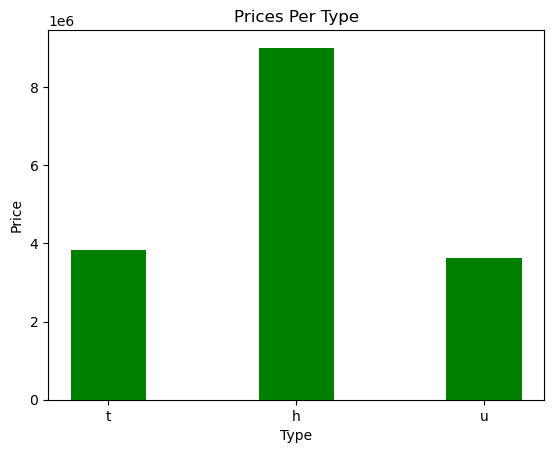

In [87]:
plt.bar(mel_housing['Type'],mel_housing['Price'],color='green',width= 0.4)
plt.title('Prices Per Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

In [88]:
pd.crosstab(mel_housing['Price'], mel_housing['Type'])

Type,h,t,u
Price,,,
85000.0,0,0,1
131000.0,1,0,0
145000.0,1,0,0
160000.0,0,0,1
170000.0,0,0,1
...,...,...,...
6500000.0,1,0,0
6600000.0,1,0,0
7650000.0,1,0,0


Regionname is another category i looked at to help further delve into predicting the house pricing. I  wanted to make a box plot for this to identify the regions with the highest and lowest prices.

In [89]:
print(mel_housing['Regionname'].unique())

['Western Metropolitan', 'Southern Metropolitan', 'Northern Metropolitan', 'Eastern Metropolitan', 'South-Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria', 'Western Victoria']
Categories (8, object): ['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']


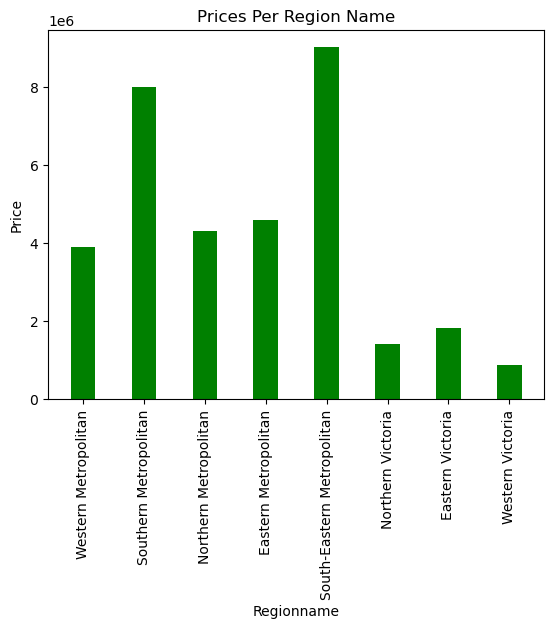

In [90]:
plt.bar(mel_housing['Regionname'],mel_housing['Price'],color='green',width= 0.4)
plt.xticks(rotation = 90)
plt.title('Prices Per Region Name')
plt.xlabel('Regionname')
plt.ylabel('Price')
plt.show()

Frequency Table for Price and Region Names as I want to visualise this set of data to check the frequency of the prices per region as i am only foc on a few categories to make it simpler for myself

In [91]:
pd.crosstab(mel_housing['Price'], mel_housing['Regionname'])

Regionname,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
Price,,,,,,,,
85000.0,0,0,0,0,0,0,1,0
131000.0,0,0,0,0,0,1,0,0
145000.0,0,0,1,0,0,0,0,0
160000.0,0,0,0,0,0,1,0,0
170000.0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
6500000.0,0,0,0,0,0,1,0,0
6600000.0,0,0,0,0,0,1,0,0
7650000.0,0,0,0,0,0,1,0,0


3.3 Creating interaction features or polynomial features

<Axes: xlabel='PropertyAge', ylabel='Price'>

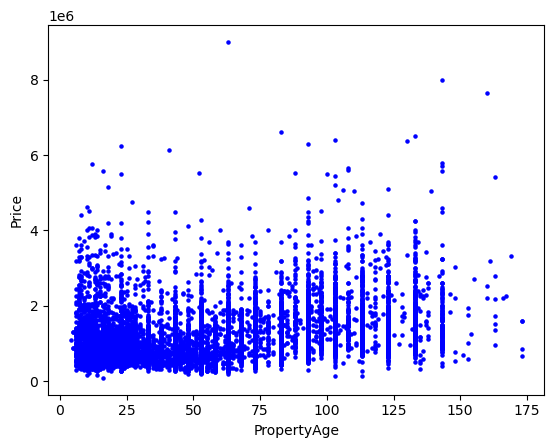

In [92]:
mel_housing.plot.scatter(x = 'PropertyAge', y = 'Price', s = 5, c = 'blue')

<Axes: xlabel='Landsize', ylabel='Price'>

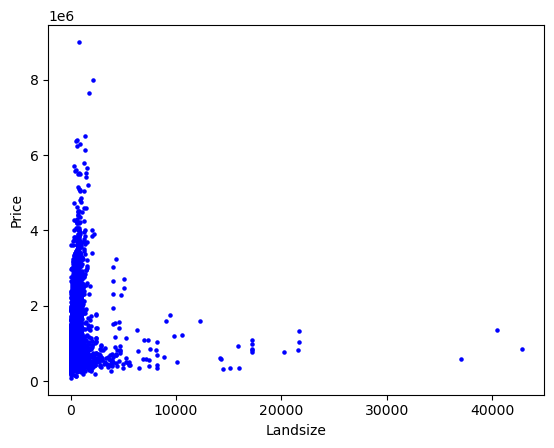

In [93]:
mel_housing.plot.scatter(x = 'Landsize', y = 'Price', s = 5, c = 'blue')

<Axes: xlabel='Distance', ylabel='Price'>

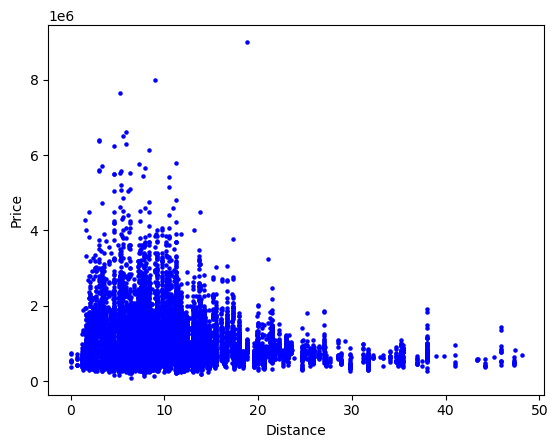

In [94]:
mel_housing.plot.scatter(x = 'Distance', y = 'Price', s = 5, c = 'blue')

## Conclusion and Recommendations (10 points):

Summarize the key findings from the EDA and feature engineering processes



Key findings from the melbourne housing dataset I found where that normally as the distance decreases the price increases.Similarly, the higher the property age the higher the price was which I find stange as in Ireland, normally older properties are cheaper compared to newer properties here. The price can be grouped by Region names and Type to provide a clearer overview of where exactly the price increase may occur according to historical trends. In the case for Regions in Melbourne housing, South Eastern Metropolitan had the highest price for housing so it seems that will also increase as the years go by. All the data is relative to 2023 as that is the current year I am analysing it.

Feature Engineering methods I used were one hot encoding to assign some of the column names as type category to figure out how i can relate them to price and organise the data a bit more, deleting minimal missing random values as it would not impede on my analysis and I wanted to use those values to help predict price, creating graphs for visual analysis to plot the out a plan for the data, I got rid of invalid values that were not to many and seemed like outliers in the grand scheme of analysing.


In conclusion, I surmise that using regionname, type, distance, landsize, propertyage we can predict the future price of melbourne housing. I believe these values are important enough in the data. This data is easy enough to read and understand with some given context about Type. This data is easy enough to graph.

In [101]:
mel_housing[["Regionname","Type","Distance","Landsize","PropertyAge","Price"]]

,Regionname,Type,Distance,Landsize,PropertyAge,Price
1,Western Metropolitan,t,13.5,303.0,7.0,840000.0
2,Southern Metropolitan,h,3.3,120.0,123.0,1275000.0
4,Northern Metropolitan,h,6.4,174.0,20.0,NaN
5,Northern Metropolitan,h,6.4,853.0,93.0,2000000.0
6,Northern Metropolitan,h,6.4,208.0,10.0,1110000.0
...,...,...,...,...,...,...
34851,South-Eastern Metropolitan,h,22.7,569.0,64.0,627500.0
34852,Northern Metropolitan,u,12.0,NaN,33.0,475000.0
34853,Northern Metropolitan,h,20.6,NaN,28.0,591000.0
34854,South-Eastern Metropolitan,h,22.2,534.0,53.0,NaN
